In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import scipy

In [21]:
import itertools

top_nodes = [1,2,3,4,5]
bottom_nodes = ['a','b','c','d','e','f','g']
weighted_edges = []

for u,v in itertools.product(top_nodes,bottom_nodes):
    weighted_edges.append((u,v,-np.random.rand()))

In [22]:
B = nx.Graph()
B.add_nodes_from(top_nodes,bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)
B.add_weighted_edges_from(weighted_edges)

In [30]:
from networkx.algorithms.bipartite.matrix import biadjacency_matrix
from networkx.algorithms.bipartite import sets as bipartite_sets

def minimum_weight_full_matching(G, top_nodes=None, weight='weight'):
    try:
        import scipy.optimize
    except ImportError:
        raise ImportError('minimum_weight_full_matching requires SciPy: ' +
                          'https://scipy.org/')
    left, right = nx.bipartite.sets(G, top_nodes)
    # Ensure that the graph is complete. This is currently a requirement in
    # the underlying  optimization algorithm from SciPy, but the constraint
    # will be removed in SciPy 1.4.0, at which point it can also be removed
    # here.
    for (u, v) in itertools.product(left, right):
        # As the graph is undirected, make sure to check for edges in
        # both directions
        if (u, v) not in G.edges() and (v, u) not in G.edges():
            raise ValueError('The bipartite graph must be complete.')
    U = list(left)
    V = list(right)
    weights = biadjacency_matrix(G, row_order=U,
                                 column_order=V, weight=weight).toarray()
    left_matches = scipy.optimize.linear_sum_assignment(weights)
    d = {U[u]: V[v] for u, v in zip(*left_matches)}
    # d will contain the matching from edges in left to right; we need to
    # add the ones from right to left as well.
    #d.update({v: u for u, v in d.items()})
    return d

In [24]:
#from networkx.algorithms.bipartite import matching
#from networkx.algorithms import bipartite
minimum_weight_full_matching(B,top_nodes=top_nodes,weight='weight')

{1: 'f',
 2: 'a',
 3: 'e',
 4: 'd',
 5: 'g',
 'f': 1,
 'a': 2,
 'e': 3,
 'd': 4,
 'g': 5}

In [2]:
nx.__version__

'2.3'

In [3]:
evaluation = np.load('data/overallmodel.npy')

In [4]:
evaluation # island ; country ; function ; time

array([[[[0.51133602, 0.51133602, 0.51133602, ..., 0.51133602,
          0.51133602, 0.51133602],
         [0.67478984, 0.67036584, 0.66594184, ..., 0.42262184,
          0.41819784, 0.41377384],
         [0.59306293, 0.59085093, 0.58863893, ..., 0.46697893,
          0.46476693, 0.46255493],
         [0.15759916, 0.15759916, 0.15759916, ..., 0.15759916,
          0.15759916, 0.15759916],
         [0.37533104, 0.37422504, 0.37311904, ..., 0.31228904,
          0.31118304, 0.31007704]],

        [[0.47676086, 0.47676086, 0.47676086, ..., 0.47676086,
          0.47676086, 0.47676086],
         [0.69112381, 0.69133714, 0.69155048, ..., 0.70328381,
          0.70349714, 0.70371048],
         [0.58394233, 0.584049  , 0.58415567, ..., 0.59002233,
          0.590129  , 0.59023567],
         [0.14235394, 0.14235394, 0.14235394, ..., 0.14235394,
          0.14235394, 0.14235394],
         [0.36314814, 0.36320147, 0.3632548 , ..., 0.36618814,
          0.36624147, 0.3662948 ]],

        [[0.2836

In [281]:
countries = [
"Australia",
"Germany",
"Japan",
"Netherlands",
"New Zealand",
"Poland",
"Russia",
"Singapore",
"Spain",
'Sweden',
'Ukraine',
'United States']

islands = [
    'Kiribati',
    'Maldives',
    'Marshall Islands',
    'Tuvalu']

weighted_edges = []
for u,v in itertools.product(islands,countries):
    i = islands.index(u)
    j = countries.index(v)
    weighted_edges.append((u,v, -evaluation[i][j][4][0])) #[0,29],[30,41],[42,59]

In [282]:
B = nx.Graph()
B.add_nodes_from(islands,bipartite=0)
B.add_nodes_from(countries, bipartite=1)
B.add_weighted_edges_from(weighted_edges)

In [283]:
matchings = minimum_weight_full_matching(B,top_nodes=islands,weight='weight')

In [284]:
matchings

{'Tuvalu': 'Sweden',
 'Maldives': 'Singapore',
 'Kiribati': 'Spain',
 'Marshall Islands': 'United States'}

In [195]:
matching_edges1 = list(matchings.items())

In [262]:
matching_edges2 = list(matchings.items())

In [254]:
matching_edges3 = list(matchings.items())

In [263]:
B1 = nx.Graph()
B1.add_nodes_from(islands,bipartite=0)
B1.add_nodes_from(countries, bipartite=1)
B1.add_edges_from(matching_edges1)

B2 = nx.Graph()
B2.add_nodes_from(islands,bipartite=0)
B2.add_nodes_from(countries, bipartite=1)
B2.add_edges_from(matching_edges2)

B3 = nx.Graph()
B3.add_nodes_from(islands,bipartite=0)
B3.add_nodes_from(countries, bipartite=1)
B3.add_edges_from(matching_edges3)

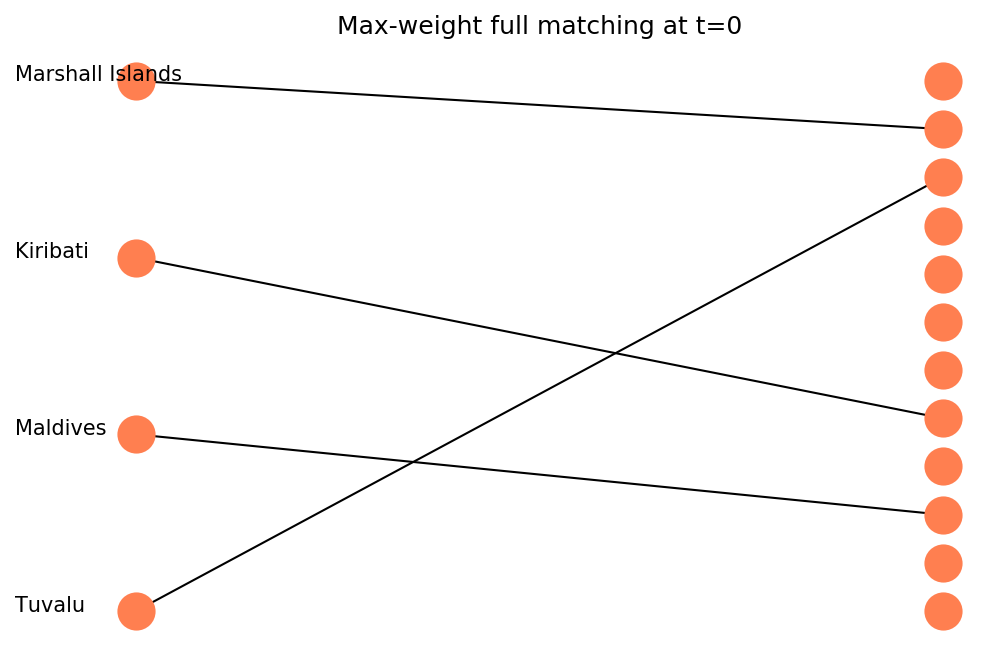

In [276]:
#G = nx.dodecahedral_graph()
#nx.draw(G)
plt.figure(dpi=150)
pos = nx.bipartite_layout(B1, islands)
nx.draw(B1, pos=pos,node_size=300, node_color='coral')

labels = dict()
for n in B1.nodes:
    labels[n] = n
    
for i in islands:
    x,y=pos[i]
    plt.text(x-0.20,y,i)
#nx.draw_networkx_labels(B1,pos,labels,font_size=16)
plt.title('Max-weight full matching at t=0')
plt.show()

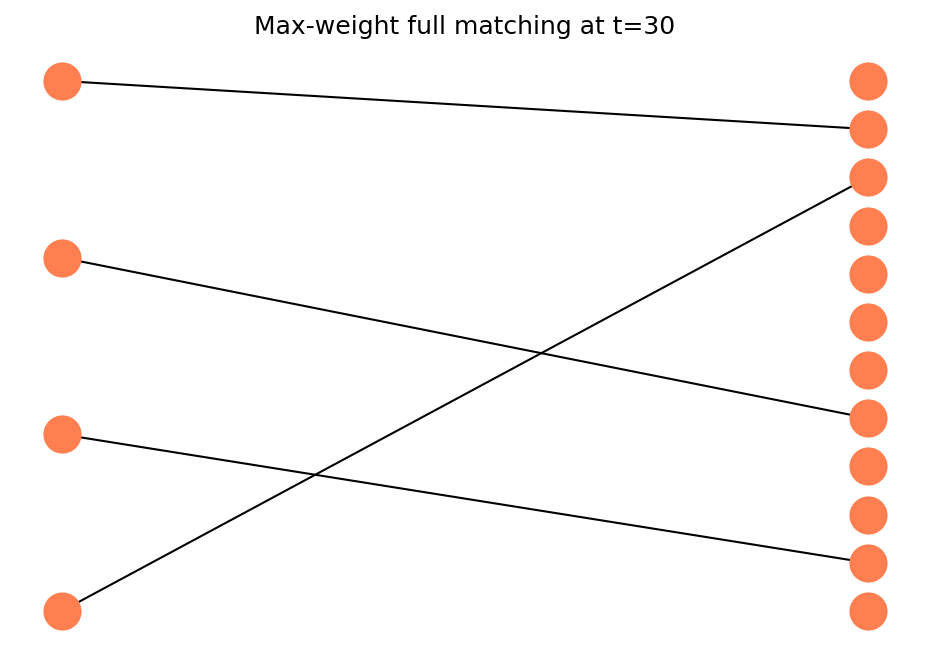

In [278]:
#G = nx.dodecahedral_graph()
#nx.draw(G)
plt.figure(dpi=150)
pos = nx.bipartite_layout(B2, islands)
nx.draw(B2, pos=pos,node_size=300, node_color='coral')

    
#for key in labels.keys():
    #x,y=pos[key]
    #plt.text(x+0.05,y,key)
#nx.draw_networkx_labels(B1,pos,labels,font_size=16)
plt.title('Max-weight full matching at t=30')
plt.show()

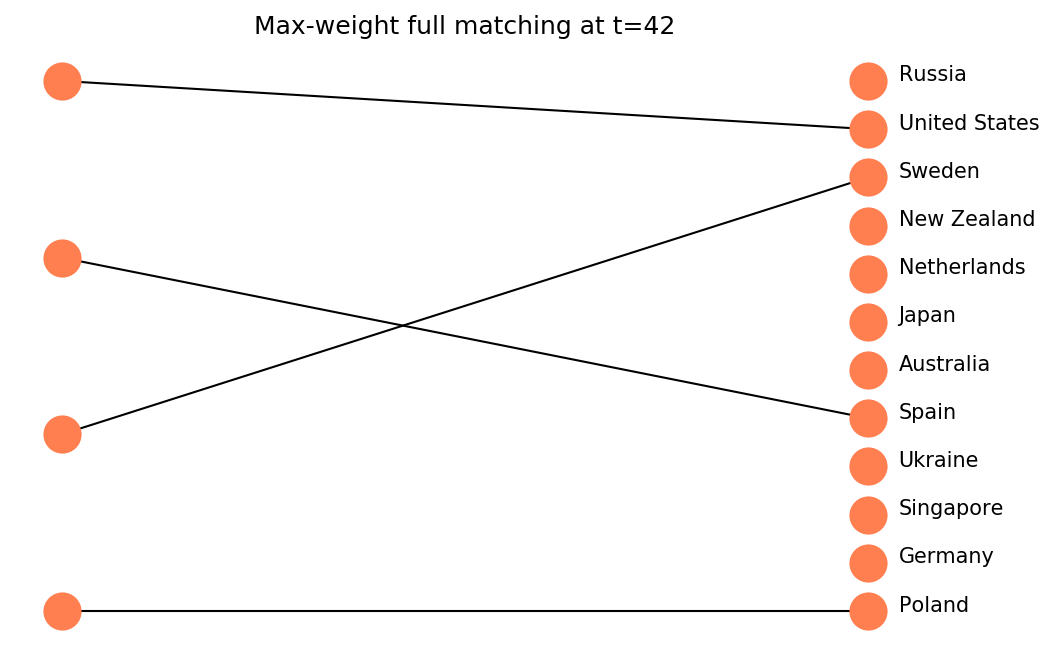

In [280]:
#G = nx.dodecahedral_graph()
#nx.draw(G)
plt.figure(dpi=150)
pos = nx.bipartite_layout(B3, islands)
nx.draw(B3, pos=pos,node_size=300, node_color='coral')

    
for c in countries:
    x,y=pos[c]
    plt.text(x+0.05,y,c)
#nx.draw_networkx_labels(B1,pos,labels,font_size=16)
plt.title('Max-weight full matching at t=42')
plt.show()